In [337]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [338]:
import itertools
import seaborn as sns
import pandas_profiling
import statsmodels.formula.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [339]:
from sklearn import datasets
from sklearn.feature_selection import RFE
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

In [340]:
df_normal=pd.read_csv(r"C:\Users\Dell\Downloads\New folder (2)\New folder (2)\Data_of_Attack_Back_Normal.csv")

In [341]:
df_normal['attack']='normal'

In [342]:
df_normal.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0.0,0.0,0.0,0.0,0.00215,0.45076,0,0,0.0,0.0,...,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,normal
1,0.0,0.0,0.0,0.0,0.00162,0.04528,0,0,0.0,0.0,...,0.001,0.1,0.0,0.100,0.0,0.0,0.0,0.0,0.0,normal
2,0.0,0.0,0.0,0.0,0.00236,0.01228,0,0,0.0,0.0,...,0.002,0.1,0.0,0.050,0.0,0.0,0.0,0.0,0.0,normal
3,0.0,0.0,0.0,0.0,0.00233,0.02032,0,0,0.0,0.0,...,0.003,0.1,0.0,0.033,0.0,0.0,0.0,0.0,0.0,normal
4,0.0,0.0,0.0,0.0,0.00239,0.00486,0,0,0.0,0.0,...,0.004,0.1,0.0,0.025,0.0,0.0,0.0,0.0,0.0,normal


In [343]:
df_normal.shape

(576710, 42)

In [344]:
df_smurf = pd.read_csv(r"C:\Users\Dell\Downloads\New folder (2)\New folder (2)\Data_of_Attack_Back_Smurf.csv")

In [345]:
df_satan = pd.read_csv(r"C:\Users\Dell\Downloads\New folder (2)\New folder (2)\Data_of_Attack_Back_Satan.csv")

In [346]:
df_root_kit = pd.read_csv(r"C:\Users\Dell\Downloads\New folder (2)\New folder (2)\Data_of_Attack_Back_RootKit.csv")

In [347]:
df_port_sweep = pd.read_csv(r"C:\Users\Dell\Downloads\New folder (2)\New folder (2)\Data_of_Attack_Back_PortSweep.csv")

In [348]:
df_neptune = pd.read_csv(r"C:\Users\Dell\Downloads\New folder (2)\New folder (2)\Data_of_Attack_Back_Neptune.csv")

In [349]:
df_nmap = pd.read_csv(r"C:\Users\Dell\Downloads\New folder (2)\New folder (2)\Data_of_Attack_Back_NMap.csv")

In [350]:
df_guess_pass = pd.read_csv(r"C:\Users\Dell\Downloads\New folder (2)\New folder (2)\Data_of_Attack_Back_GuessPassword.csv")

In [351]:
df_ftp_write = pd.read_csv(r"C:\Users\Dell\Downloads\New folder (2)\New folder (2)\Data_of_Attack_Back_FTPWrite.csv")

In [352]:
df_buffer_overflow = pd.read_csv(r"C:\Users\Dell\Downloads\New folder (2)\New folder (2)\Data_of_Attack_Back_BufferOverflow.csv")

In [353]:
df_back = pd.read_csv(r"C:\Users\Dell\Downloads\New folder (2)\New folder (2)\Data_of_Attack_Back.csv")

In [354]:
df_back.shape

(968, 41)

In [355]:
list_of_df = [df_normal,
              df_satan,
              df_root_kit,
              df_port_sweep,
              df_smurf,
              df_neptune,
              df_nmap,
              df_guess_pass,
              df_ftp_write ,
              df_buffer_overflow,
              df_back]


df = pd.concat(list_of_df, ignore_index=True, sort=False)

In [356]:
df.shape

(817550, 83)

In [357]:
df.columns

Index(['duration', ' protocol_type', ' service', ' flag', ' src_bytes',
       ' dst_bytes', ' land', ' wrong_fragment', ' urgent', ' hot',
       ' num_failed_logins', ' logged_in', ' num_compromised', ' root_shell',
       ' su_attempted', ' num_root', ' num_file_creations', ' num_shells',
       ' num_access_files', ' num_outbound_cmds', ' is_host_login',
       ' is_guest_login', ' count', ' srv_count', ' serror_rate',
       ' srv_error_rate', ' rerror_rate', ' srv_rerror_rate', ' same_srv_rate',
       ' diff_srv_rate', ' srv_diff_host_rate', ' dst_host_count',
       ' dst_host_srv_count', ' dst_host_same_srv_rate',
       ' dst_host_diff_srv_rate', ' dst_host_same_src_port_rate',
       ' dst_host_srv_diff_host_rate', ' dst_host_serror_rate',
       ' dst_host_srv_serror_rate', ' dst_host_rerror_rate',
       ' dst_host_srv_rerror_rate', 'attack', '0.0026', ' 0', ' 0.07', ' 0.3',
       ' 0.00116', ' 0.00451', ' 0.4', ' 0.5', ' 0.6', ' 0.2', ' 0.7', ' 0.1',
       ' 0.8', ' 0.9

In [358]:
cols=[i.strip() for i in df.columns]
df.columns=cols

In [359]:
print(df.columns)

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_error_rate',
       'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack', '0.0026',
       '0', '0.07', '0.3', '0.00116', '0.00451', '0.4', '0.5', '0.6', '0.2',
       '0.7', '0.1', '0.8', '0.9', '0.10', '0.11', '0.1.1', '0.12', '0.1.2',
       '0.13', 

In [360]:
df.attack.unique()

array(['normal', nan], dtype=object)

In [361]:
df.drop_duplicates(keep='first',inplace=True)

In [362]:
df.protocol_type.unique()

array([0.  , 0.01, 0.02,  nan])

In [363]:
df.service.unique()

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.13, 0.14, 0.17, 0.32, 0.22, 0.12, 0.33, 0.39, 0.19, 0.62,
       0.35, 0.24, 0.36, 0.37, 0.38, 0.52, 0.47, 0.59, 0.55, 0.28, 0.29,
       0.27, 0.26, 0.25, 0.23, 0.21, 0.2 , 0.15, 0.16, 0.3 , 0.31, 0.18,
       0.5 , 0.46, 0.58, 0.57, 0.51, 0.41, 0.6 , 0.56, 0.43, 0.4 , 0.63,
       0.64, 0.65, 0.42, 0.53, 0.48, 0.44, 0.45, 0.34, 0.54, 0.61, 0.49,
       0.67,  nan])

In [364]:
df.flag.unique()

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.1 , 0.09,
        nan])

In [365]:
df1=df.copy()

In [366]:
df1.attack=np.where(df1.attack!='normal','attack','normal')

In [367]:
df1.attack.value_counts(normalize=True)

normal    0.705413
attack    0.294587
Name: attack, dtype: float64

In [368]:
df1['protocol_type']=df1['protocol_type'].astype('object')
df1['service']=df1['service'].astype('object')
df1['flag']=df1['flag'].astype('object')
df1['logged_in']=df1['logged_in'].astype('category')
df1['root_shell']=df1['root_shell'].astype('object')
df1['su_attempted']=df1['su_attempted'].astype('object')
df1['is_host_login']=df1['is_host_login'].astype('object')
df1['is_guest_login']=df1['is_guest_login'].astype('object')

In [369]:
cat_var=df1.select_dtypes(['object','category'])
cat_var.columns

Index(['protocol_type', 'service', 'flag', 'logged_in', 'root_shell',
       'su_attempted', 'is_host_login', 'is_guest_login', 'attack'],
      dtype='object')

In [370]:
cont_var=df1.select_dtypes(['float64','int64'])
cont_var.columns

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'num_compromised', 'num_root',
       'num_file_creations', 'num_shells', 'num_access_files',
       'num_outbound_cmds', 'count', 'srv_count', 'serror_rate',
       'srv_error_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', '0.0026', '0', '0.07', '0.3', '0.00116',
       '0.00451', '0.4', '0.5', '0.6', '0.2', '0.7', '0.1', '0.8', '0.9',
       '0.10', '0.11', '0.1.1', '0.12', '0.1.2', '0.13', '0.14', '0.1.3',
       '0.001', '0.001.1', '0.15', '0.16', '0.17', '0.18', '0.1.4', '0.19',
       '0.20', '0.001.2', '0.001.3', '0.1.5',

In [371]:
# Create Data audit Report for continuous variables
def continuous_var_summary(x):
    return pd.Series([ x.isnull().sum(), x.sum(), x.mean(), x.median(),  
                      x.std(), x.min(), x.quantile(0.01), x.quantile(0.05),
                          x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), 
                              x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index = ['NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'MIN', 'P1', 
                               'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

In [372]:
cont_var.apply(continuous_var_summary).T

,NMISS,SUM,MEAN,MEDIAN,STD,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
duration,7.0,716.80880,8.767853e-04,0.00000,0.026636,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.00000,0.00000,0.00150,1.00
src_bytes,7.0,4056.16668,4.961417e-03,0.00217,0.033235,0.0,0.0,0.0,0.0,0.0,0.00217,0.00299,0.00367,0.01154,0.07012,1.00
dst_bytes,7.0,20325.60266,2.486185e-02,0.00367,0.066634,0.0,0.0,0.0,0.0,0.0,0.00367,0.01969,0.06691,0.11762,0.30933,1.00
land,7.0,0.00000,0.000000e+00,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00
wrong_fragment,7.0,0.30000,3.669536e-07,0.00000,0.000332,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.22,817542.0,0.09400,1.342857e-02,0.00200,0.021778,0.0,0.0,0.0,0.0,0.0,0.00200,0.02100,0.04400,0.04700,0.04940,0.05
0.23,817542.0,0.00000,0.000000e+00,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00
0.24,817542.0,0.00000,0.000000e+00,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00
0.25,817542.0,0.00000,0.000000e+00,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00


In [373]:
cont_var.duration.value_counts()

0.0000    782306
0.0001     12674
0.0002      3342
0.0003      2458
0.0005      2155
           ...  
0.0320         1
0.0774         1
0.0403         1
0.0421         1
0.0290         1
Name: duration, Length: 918, dtype: int64

In [374]:
cont_var=cont_var.apply(lambda x: x.clip(lower=x.quantile(0.01), upper=x.quantile(0.99)))

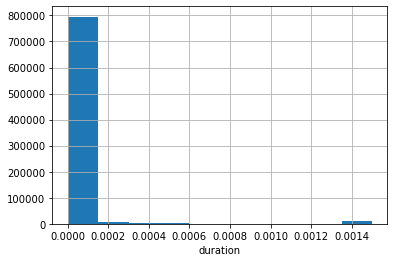

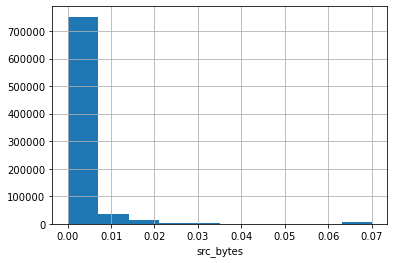

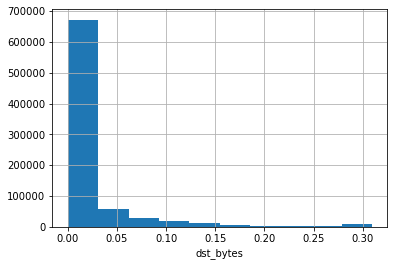

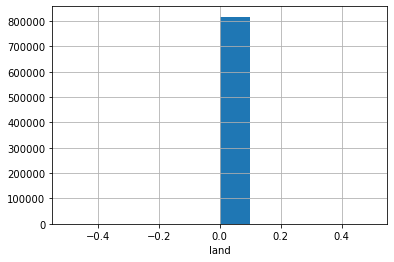

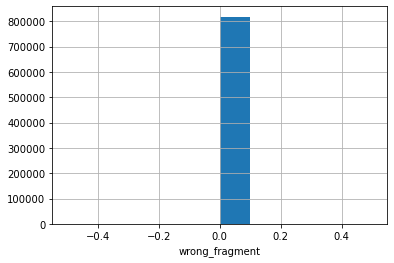

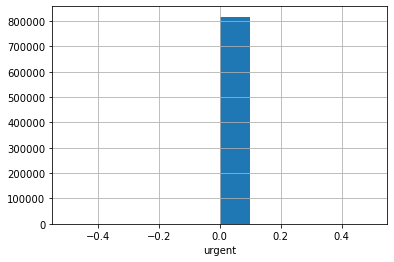

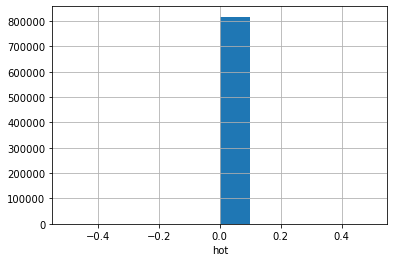

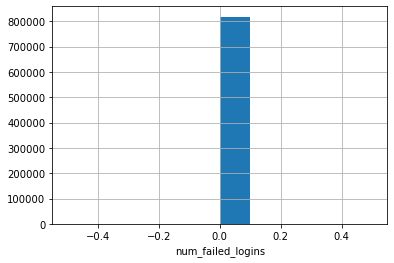

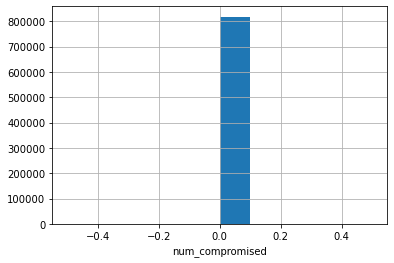

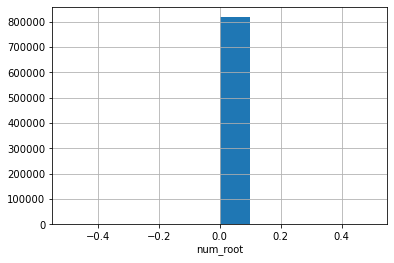

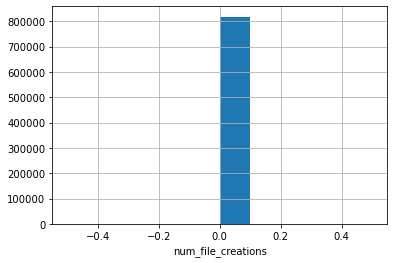

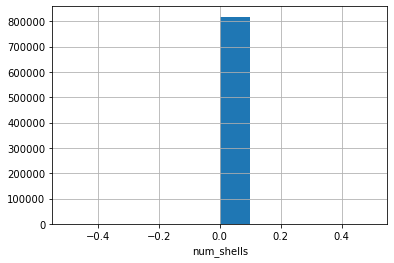

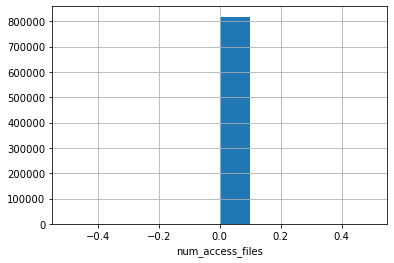

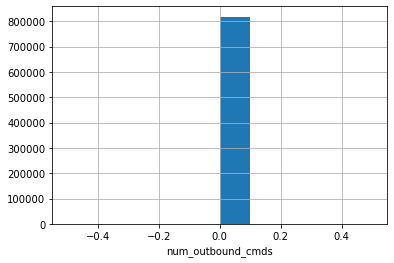

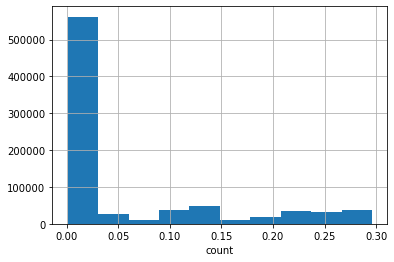

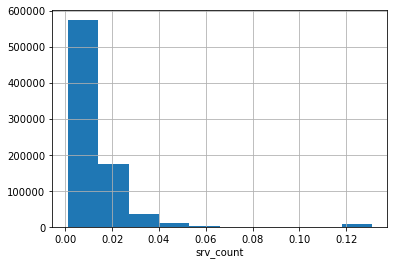

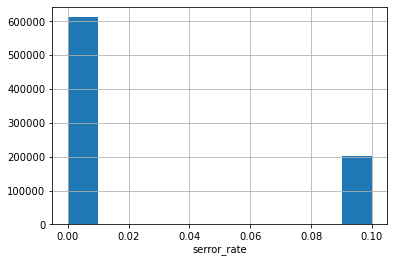

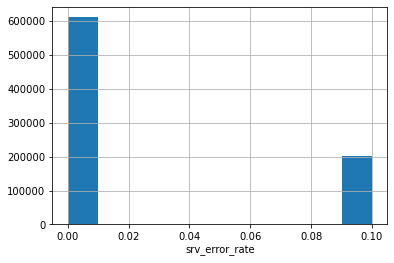

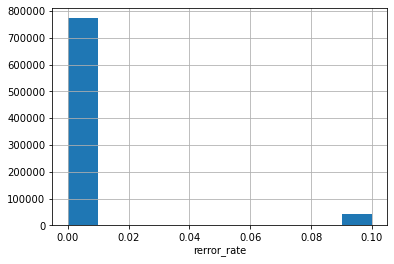

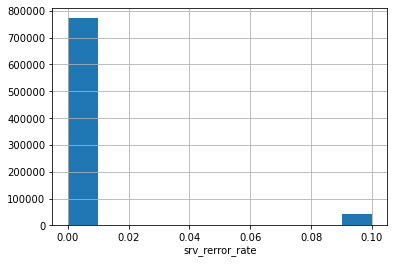

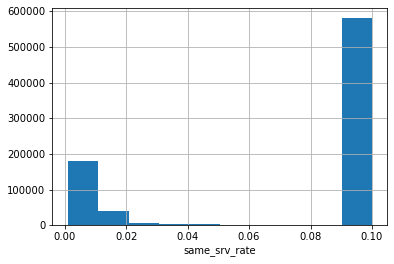

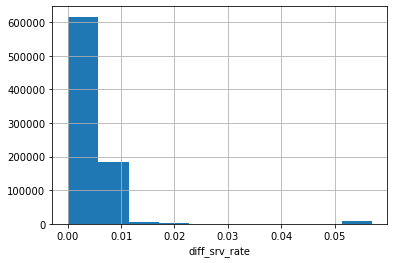

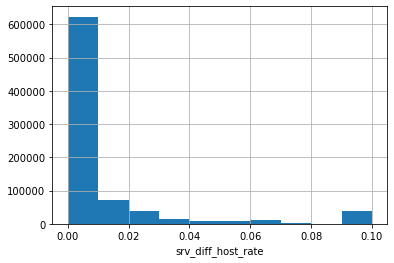

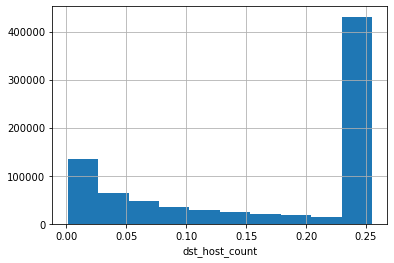

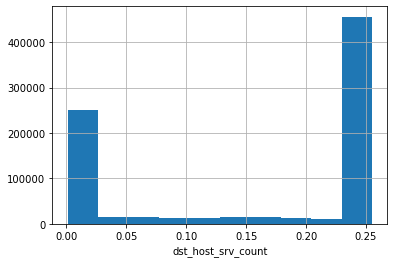

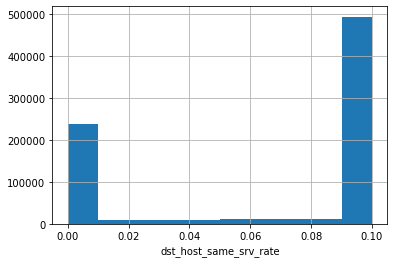

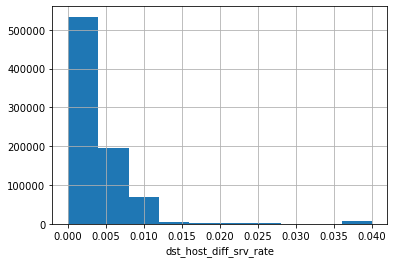

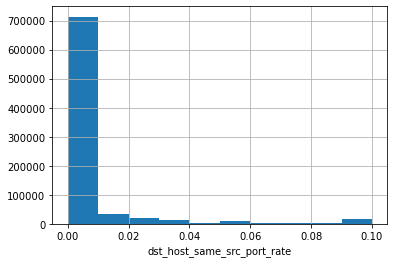

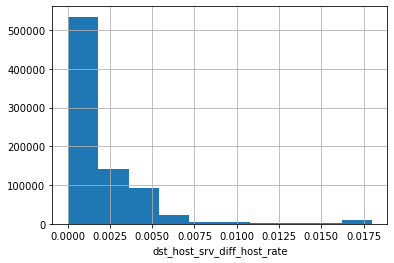

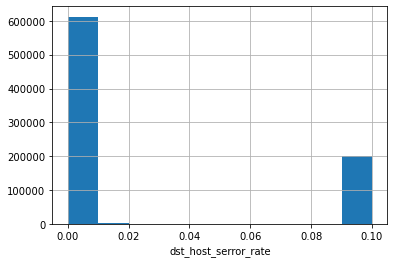

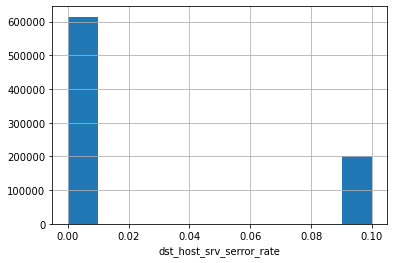

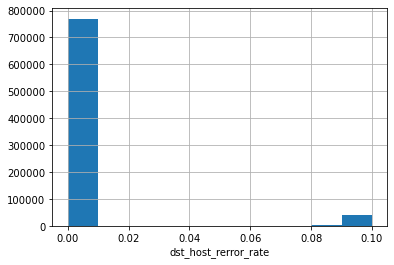

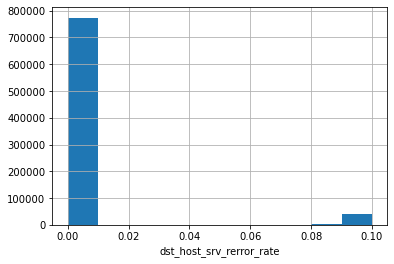

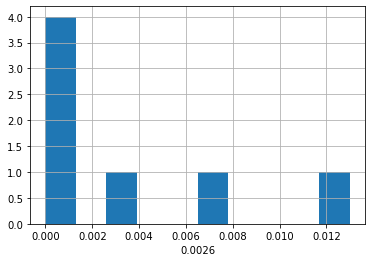

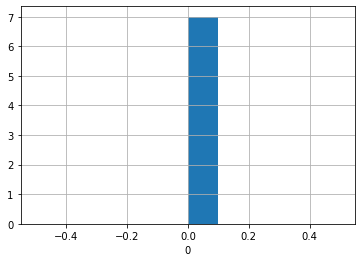

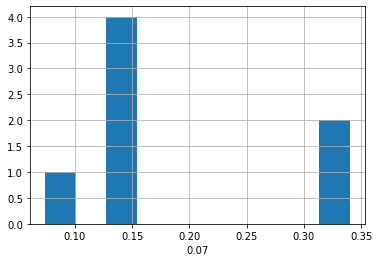

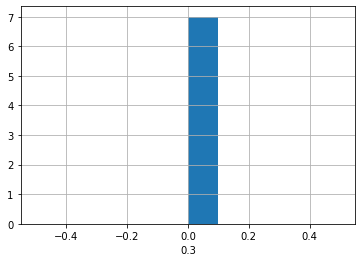

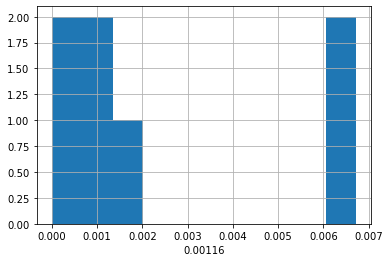

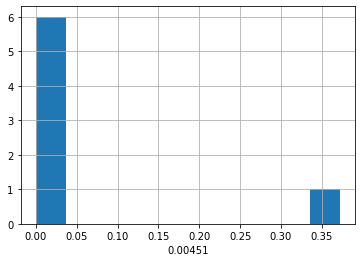

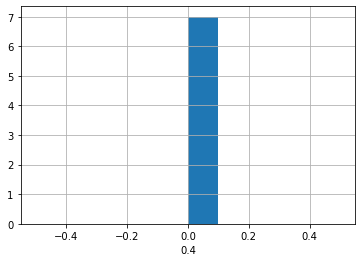

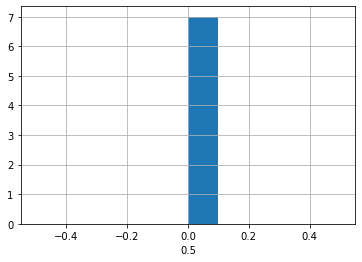

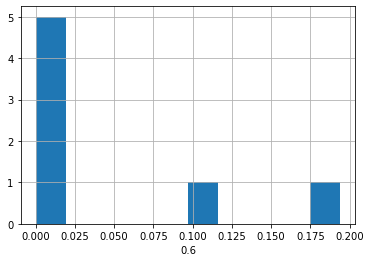

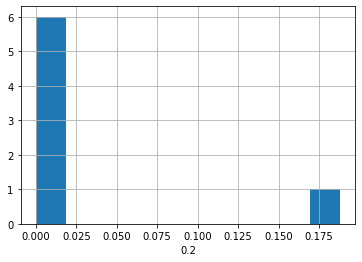

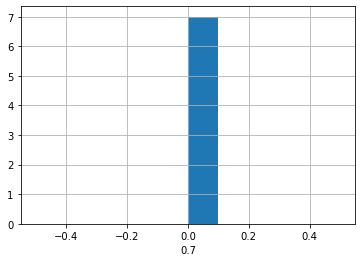

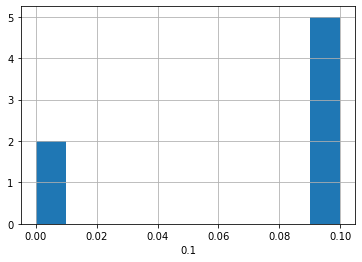

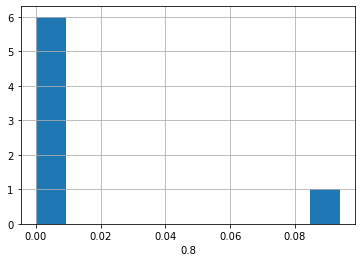

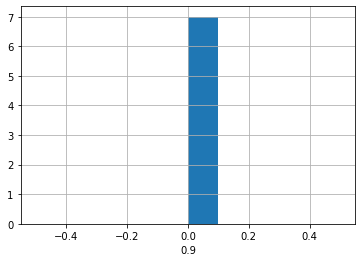

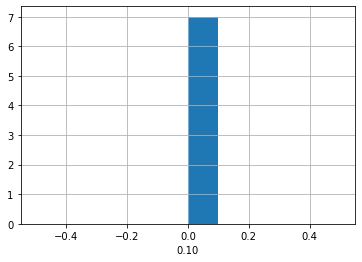

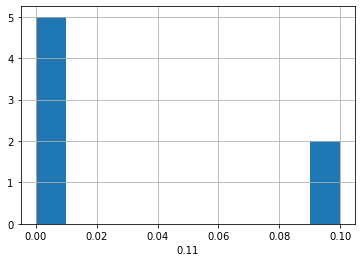

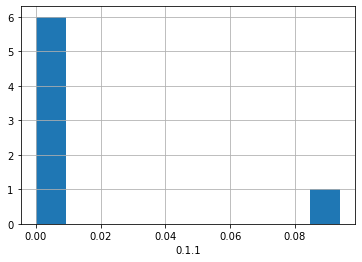

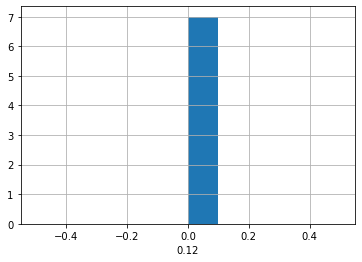

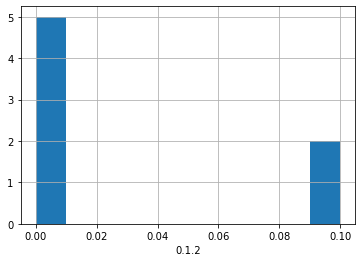

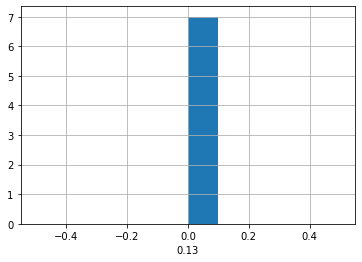

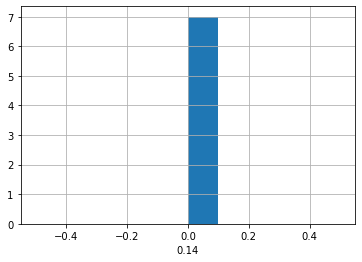

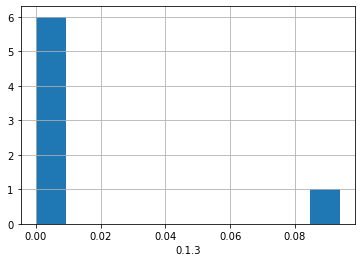

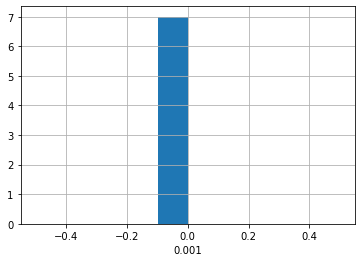

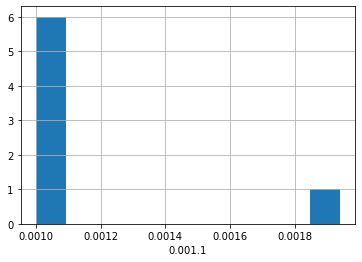

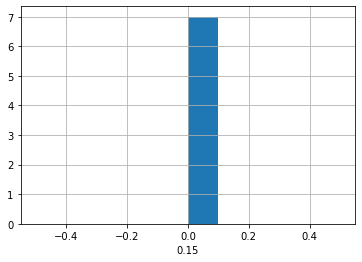

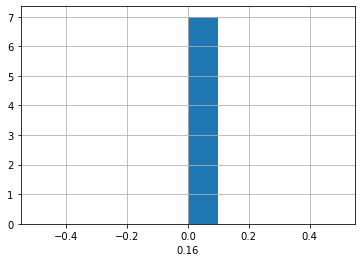

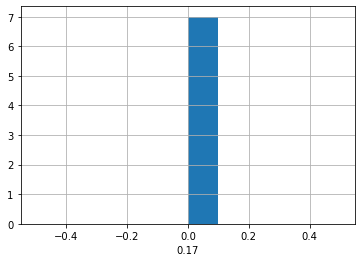

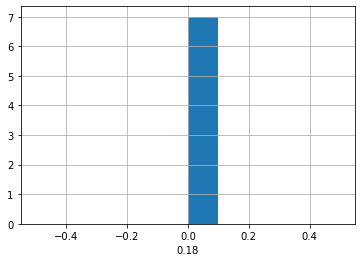

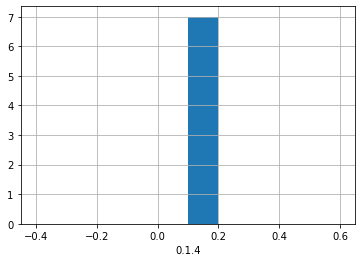

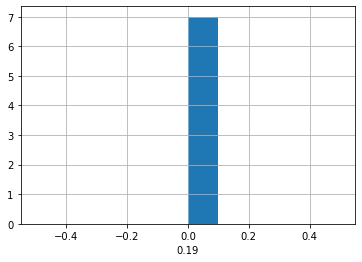

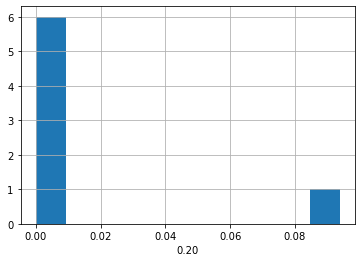

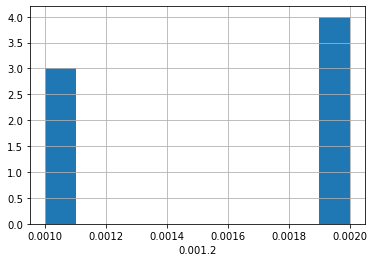

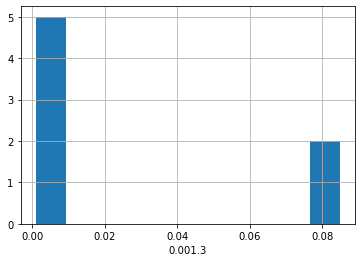

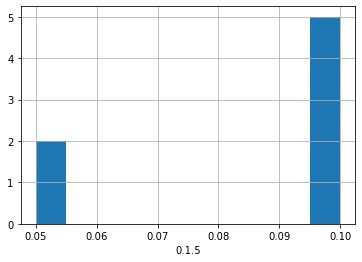

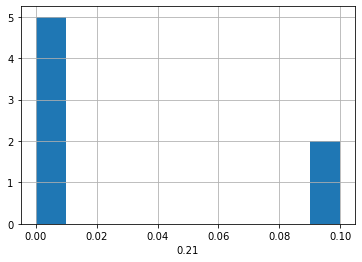

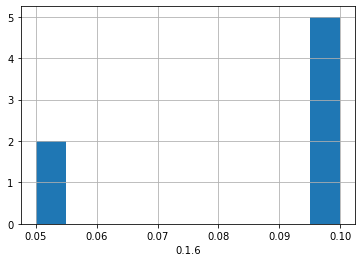

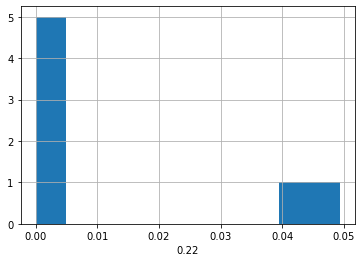

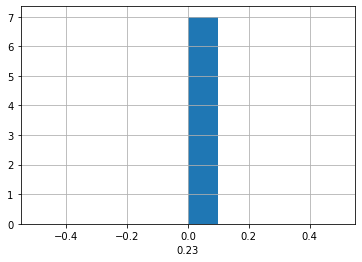

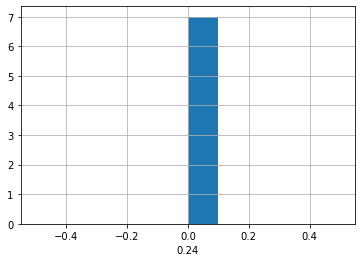

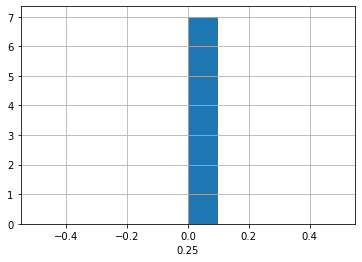

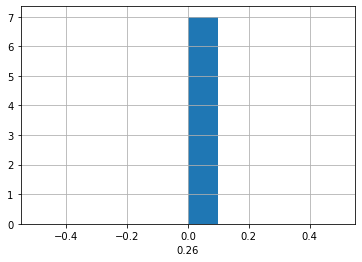

In [375]:
for i in cont_var.columns:
    cont_var[i].hist()
    plt.xlabel(str(i))
    plt.show()

In [376]:
# land,wrong_fragment,urgent,hot,num_failed_logins,num_compromised, num_root, num_file_creations, num_shells, num_access_files,num_outbound_cmds
cont_var.num_outbound_cmds.value_counts()

0.0    817542
Name: num_outbound_cmds, dtype: int64

In [377]:
# drop constatnt or minority counts for continous features
cont_var.drop(['land', 'wrong_fragment','urgent','hot', 'num_failed_logins', 'num_compromised', 'num_root',
'num_file_creations', 'num_shells', 'num_access_files','num_outbound_cmds'], axis = 1, inplace = True)

In [378]:
cont_var.shape

(817549, 63)

In [379]:
cat_var.protocol_type=cat_var.protocol_type.apply(lambda x:str(x).strip())
cat_var.flag=cat_var.flag.apply(lambda x:str(x).strip())
cat_var.service=cat_var.service.apply(lambda x:str(x).strip())

In [380]:
cat_var.protocol_type.unique()

array(['0.0', '0.01', '0.02', 'nan'], dtype=object)

In [381]:
cat_var.protocol_type=cat_var.protocol_type.map({'0.0':'zero','0.01':'one','0.02':'two'})

In [382]:
cat_var.protocol_type.unique()

array(['zero', 'one', 'two', nan], dtype=object)

In [383]:
cat_var.flag.unique()

array(['0.0', '0.01', '0.02', '0.03', '0.04', '0.05', '0.06', '0.07',
       '0.08', '0.1', '0.09', 'nan'], dtype=object)

In [384]:
cat_var.flag=cat_var.flag.map({'0.0':'zero','0.01':'one','0.02':'two','0.03':'three','0.04':'four','0.05':'five','0.06':'six','0.07':'seven','0.08':'eight','0.09':'nine','0.1':'ten'})"

SyntaxError: EOL while scanning string literal (3951051851.py, line 1)

In [385]:
cat_var.flag.unique()

array(['0.0', '0.01', '0.02', '0.03', '0.04', '0.05', '0.06', '0.07',
       '0.08', '0.1', '0.09', 'nan'], dtype=object)

In [386]:
cat_var.service.unique()

array(['0.0', '0.01', '0.02', '0.03', '0.04', '0.05', '0.06', '0.07',
       '0.08', '0.09', '0.1', '0.11', '0.13', '0.14', '0.17', '0.32',
       '0.22', '0.12', '0.33', '0.39', '0.19', '0.62', '0.35', '0.24',
       '0.36', '0.37', '0.38', '0.52', '0.47', '0.59', '0.55', '0.28',
       '0.29', '0.27', '0.26', '0.25', '0.23', '0.21', '0.2', '0.15',
       '0.16', '0.3', '0.31', '0.18', '0.5', '0.46', '0.58', '0.57',
       '0.51', '0.41', '0.6', '0.56', '0.43', '0.4', '0.63', '0.64',
       '0.65', '0.42', '0.53', '0.48', '0.44', '0.45', '0.34', '0.54',
       '0.61', '0.49', '0.67', 'nan'], dtype=object)

In [500]:
"cat_var.service=cat_var.service.map({'0.0':'zero','0.01':'one','0.02':'two','0.03':'three','0.04':'four','0.05':'five','0.06':'six','0.07':'seven','0.08':'eight','0.09':'nine','0.1':'ten','0.11':'eleven','0.12':'tweleve','0.13':'thirteen','0.14':'fourteen','0.15':'fiveteen','0.16':'sixteen','0.17':'seventeen','0.18':'eighteen','0.19':'ninteen','0.2':'tweenty','0.21':'2_one','0.22':'2_two','0.23':'2_three','0.24':'2_four','0.25':'2_five','0.26':'2_six','0.27':'2_seven','0.28':'2_eight','0.29':'2_nine','0.3':'thirty','0.31':'3_one','0.32':'3_two','0.33':'3_three','0.34':'3_four','0.35':'3_five','0.36':'3_six','0.37':'3_seven','0.38':'3_eight','0.39':'3_nine','0.4':'fourty','0.41':'4_one','0.42':'4_two','0.43':'4_three','0.44':'4_four','0.45':'4_five','0.46':'4_six','0.47':'4_seven','0.48':'4_eight','0.49':'4_nine','0.5':'fifty','0.51':'5_one','0.52':'5_two','0.53':'5_three','0.54':'5_four','0.55':'5_five','0.56':'5_six','0.57':'5_seven','0.58':'5_eight','0.59':'5_nine','0.6':'sixty','0.61':'6_one','0.62':'6_two','0.63':'6_three','0.64':'6_four','0.65':'6_five','0.66':'6_six','0.67':'6_seven'})":'3_three','0.34':'3_four','0.35':'3_five','0.36':'3_six','0.37':'3_seven','0.38':'3_eight','0.39':'3_nine','0.4':'fourty','0.41':'4_one','0.42':'4_two','0.43':'4_three','0.44':'4_four','0.45':'4_five','0.46':'4_six','0.47':'4_seven','0.48':'4_eight','0.49':'4_nine','0.5':'fifty','0.51':'5_one','0.52':'5_two','0.53':'5_three','0.54':'5_four','0.55':'5_five','0.56':'5_six','0.57':'5_seven','0.58':'5_eight','0.59':'5_nine','0.6':'sixty','0.61':'6_one','0.62':'6_two','0.63':'6_three','0.64':'6_four','0.65':'6_five','0.66':'6_six','0.67':'6_seven'})"r.service=cat_var.service.map({'0.0':'zero','0.01':'one','0.02':'two','0.03':'three','0.04':'four','0.05':'five','0.06':'six','0.07':'seven','0.08':'eigh

SyntaxError: illegal target for annotation (1521129870.py, line 1)

In [501]:
cat_var.service.unique()

array(['0.0', '0.01', '0.02', '0.03', '0.04', '0.05', '0.06', '0.07',
       '0.08', '0.09', '0.1', '0.11', '0.13', '0.14', '0.17', '0.32',
       '0.22', '0.12', '0.33', '0.39', '0.19', '0.62', '0.35', '0.24',
       '0.36', '0.37', '0.38', '0.52', '0.47', '0.59', '0.55', '0.28',
       '0.29', '0.27', '0.26', '0.25', '0.23', '0.21', '0.2', '0.15',
       '0.16', '0.3', '0.31', '0.18', '0.5', '0.46', '0.58', '0.57',
       '0.51', '0.41', '0.6', '0.56', '0.43', '0.4', '0.63', '0.64',
       '0.65', '0.42', '0.53', '0.48', '0.44', '0.45', '0.34', '0.54',
       '0.61', '0.49', '0.67', 'nan'], dtype=object)

In [502]:
cat_var.logged_in.unique()

['one', 'zero', NaN]
Categories (2, object): ['zero', 'one']

In [503]:
cat_var.logged_in=cat_var.logged_in.map({0.0:'zero',0.1:'one'})

In [504]:
cat_var.logged_in.unique()

array([nan])

In [505]:
def count_charts(x):
    sns.countplot(x)
    plt.show()

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


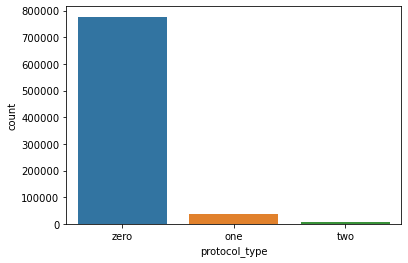

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


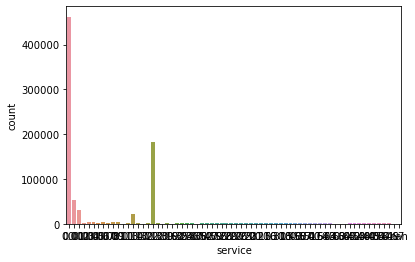

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


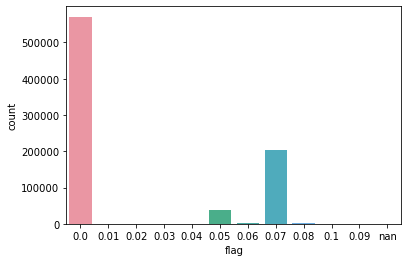

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: min() arg is an empty sequence

In [506]:
cat_var.apply(count_charts)

In [ ]:
cat_var.is_host_login.value_counts()

In [ ]:
cat_var.protocol_type.value_counts(normalize=True)

In [ ]:
cat_var.flag.value_counts(normalize=True)

In [ ]:
cat_var.service.value_counts()

In [ ]:
cat_var.logged_in.value_counts(normalize=True)

In [ ]:
# drop constatnt or minority counts for categorical features
cat_var=cat_var.drop(columns=['is_host_login','is_guest_login','root_shell','su_attempted'])

In [ ]:
cat_var.columns

In [ ]:
df_final=pd.concat([cont_var, cat_var], axis = 1)

In [ ]:
df_final.head(5)

In [ ]:
df_final = pd.get_dummies(df_final, columns=cat_var.columns, drop_first=True)

In [507]:
df_final.head()

,duration,src_bytes,dst_bytes,count,srv_count,serror_rate,srv_error_rate,rerror_rate,srv_rerror_rate,same_srv_rate,...,flag_0.04,flag_0.05,flag_0.06,flag_0.07,flag_0.08,flag_0.09,flag_0.1,flag_nan,logged_in_one,attack_normal
0,0.0,0.00215,0.30933,0.001,0.001,0.0,0.0,0.0,0.0,0.1,...,0,0,0,0,0,0,0,0,1,1
1,0.0,0.00162,0.04528,0.002,0.002,0.0,0.0,0.0,0.0,0.1,...,0,0,0,0,0,0,0,0,1,1
2,0.0,0.00236,0.01228,0.001,0.001,0.0,0.0,0.0,0.0,0.1,...,0,0,0,0,0,0,0,0,1,1
3,0.0,0.00233,0.02032,0.002,0.002,0.0,0.0,0.0,0.0,0.1,...,0,0,0,0,0,0,0,0,1,1
4,0.0,0.00239,0.00486,0.003,0.003,0.0,0.0,0.0,0.0,0.1,...,0,0,0,0,0,0,0,0,1,1


In [508]:
"df_final['flag_others']=df_final.flag_one+df_final.flag_two+df_final.flag_three+df_final.flag_four+df_final.flag_five+df_final.flag_six+df_final.flag_nine+df_final.flag_ten"

"df_final['flag_others']=df_final.flag_one+df_final.flag_two+df_final.flag_three+df_final.flag_four+df_final.flag_five+df_final.flag_six+df_final.flag_nine+df_final.flag_ten"

In [509]:
"df_final.drop(columns=['flag_one','flag_two','flag_three','flag_four','flag_five','flag_six','flag_nine','flag_ten'], inplace=True)"

"df_final.drop(columns=['flag_one','flag_two','flag_three','flag_four','flag_five','flag_six','flag_nine','flag_ten'], inplace=True)"

In [510]:
z='df_final_'+ ' +df_final.service_'.join(cat_var.service.unique())

In [511]:
z

'df_final_0.0 +df_final.service_0.01 +df_final.service_0.02 +df_final.service_0.03 +df_final.service_0.04 +df_final.service_0.05 +df_final.service_0.06 +df_final.service_0.07 +df_final.service_0.08 +df_final.service_0.09 +df_final.service_0.1 +df_final.service_0.11 +df_final.service_0.13 +df_final.service_0.14 +df_final.service_0.17 +df_final.service_0.32 +df_final.service_0.22 +df_final.service_0.12 +df_final.service_0.33 +df_final.service_0.39 +df_final.service_0.19 +df_final.service_0.62 +df_final.service_0.35 +df_final.service_0.24 +df_final.service_0.36 +df_final.service_0.37 +df_final.service_0.38 +df_final.service_0.52 +df_final.service_0.47 +df_final.service_0.59 +df_final.service_0.55 +df_final.service_0.28 +df_final.service_0.29 +df_final.service_0.27 +df_final.service_0.26 +df_final.service_0.25 +df_final.service_0.23 +df_final.service_0.21 +df_final.service_0.2 +df_final.service_0.15 +df_final.service_0.16 +df_final.service_0.3 +df_final.service_0.31 +df_final.service_0.18 

In [512]:
df_final.shape

(817549, 145)

In [513]:
#Features Reduction

In [514]:
import statsmodels.formula.api as smf
from sklearn.metrics import roc_auc_score

In [515]:
gini_df=pd.DataFrame()
for i in df_final.columns.difference(['attack_normal']):
    model=smf.logit('attack_normal~'+str(i),data="df_final").fit()
    gini=2*roc_auc_score(df_final.attack_normal,model.predict())-1
    temp=pd.DataFrame([i,gini]).T
    gini_df=pd.concat([gini_df,temp], axis=0)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\Dell\anaconda3\lib\site-packages\patsy\compat.py", line 36, in call_and_wrap_exc
    return f(*args, **kwargs)
  File "C:\Users\Dell\anaconda3\lib\site-packages\patsy\eval.py", line 165, in eval
    return eval(code, {}, VarLookupDict([inner_namespace]
  File "<string>", line 1, in <module>
  File "C:\Users\Dell\anaconda3\lib\site-packages\patsy\eval.py", line 48, in __getitem__
    return d[key]
  File "C:\Users\Dell\anaconda3\lib\site-packages\patsy\eval.py", line 48, in __getitem__
    return d[key]
TypeError: string indices must be integers

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Users\Dell\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3369, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Dell\AppData\Local\Temp\ipykernel_24772\3951016422.py", line 3, in <cell line: 2>
    model=smf.logit('attack_no

In [516]:
gini_df.columns=['feature','gini']
gini_df.sort_values(by = 'gini', inplace=True, ascending=False)
l1_sd=gini_df[gini_df.gini>=0.1].feature.values
l1_sd

ValueError: Length mismatch: Expected axis has 0 elements, new values have 2 elements

In [517]:
gini_df.sort_values(by = 'gini', inplace=True, ascending=False)

KeyError: 'gini'

In [518]:
l1_sd=gini_df[gini_df.gini>=0.1].feature.values

AttributeError: 'DataFrame' object has no attribute 'gini'

In [519]:
l1_sd

NameError: name 'l1_sd' is not defined

In [520]:
len(l1_sd)

NameError: name 'l1_sd' is not defined

In [521]:
from sklearn.feature_selection import RFE, SelectKBest,f_classif
from sklearn.ensemble import RandomForestClassifier

In [522]:
X = df_final[df_final.columns.difference(['attack_normal'])]
y = df_final[['attack_normal']]

In [523]:
SKB = SelectKBest(f_classif, k=20).fit(X, y )

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
X.column.get_support()]

In [ ]:
l2_SKB=X.columns[SKB.get_support()]

In [ ]:
RFE



rfe = RFE(RandomForestClassifier(), n_features_to_select=15).fit(X,y)

X.columns[rfe.get_support()]

In [524]:
l3_rfe=X.columns[rfe.get_support()]

NameError: name 'rfe' is not defined

In [525]:
Final_list=list(set(list(l1_sd)+list(l2_SKB)+list(l3_rfe)))

NameError: name 'l1_sd' is not defined

In [526]:
Final_list

['srv_diff_host_rate',
 'flag_others',
 'dst_bytes',
 'count',
 'dst_host_same_src_port_rate',
 'diff_srv_rate',
 'protocol_type_two',
 'dst_host_diff_srv_rate',
 'service_tweleve',
 'dst_host_srv_diff_host_rate',
 'dst_host_count',
 'service_zero',
 'src_bytes']

In [527]:
Final_list=['srv_diff_host_rate',
 #'srv_rerror_rate',
 'flag_others',
 #'serror_rate',
 'dst_bytes',
 'count',
 'dst_host_same_src_port_rate',
 #'dst_host_same_srv_rate',
 #'dst_host_srv_count',
 'diff_srv_rate',
 'protocol_type_two',
 #'same_srv_rate',
 'dst_host_diff_srv_rate',
 'service_tweleve',
 #'flag_seven',
 #'srv_error_rate',
 #'dst_host_serror_rate',
 'dst_host_srv_diff_host_rate',
 #'logged_in_one',
 'dst_host_count',
 #'rerror_rate',
 #'flag_zero',
 'service_zero',
 #'dst_host_srv_serror_rate',
 'src_bytes']

In [528]:
X_new = X[Final_list]
y = y

KeyError: "['flag_others', 'service_tweleve', 'service_zero'] not in index"

In [529]:
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(X_new.values, i) for i in range(X_new.shape[1])]
vif["features"] = X_new.columns

NameError: name 'X_new' is not defined

In [530]:
vif.sort_values(by='VIF_Factor', ascending=False, inplace=True)
vif

KeyError: 'VIF_Factor'

In [531]:
data_new = pd.concat([X_new, y], axis=1)

NameError: name 'X_new' is not defined

In [532]:
data_new.shape

NameError: name 'data_new' is not defined

In [533]:
#split the data into train & test (70%:30%) - modeling technique using statsmodels
train, test = train_test_split(data_new, test_size = 0.3, random_state=123 )

NameError: name 'data_new' is not defined

In [534]:
#split the data into train & test (70%:30%) - Modeling technique using SVC, XGboost
train_X, test_X,train_y, test_y = train_test_split(X_new, y, test_size = 0.3, random_state=123 )

NameError: name 'X_new' is not defined

In [535]:
#Logistic Regression

import statsmodels.formula.api as smf



eqn = 'attack_normal~ '+'+'.join(X_new.columns)

NameError: name 'X_new' is not defined

In [536]:
eqn

NameError: name 'eqn' is not defined

In [537]:
logit_model =smf.logit(formula = eqn, data= train).fit()
print(logit_model.summary())

NameError: name 'eqn' is not defined

In [538]:
train['pred_prob'] =logit_model.predict(train)

NameError: name 'logit_model' is not defined

In [539]:
train.head()

NameError: name 'train' is not defined

In [540]:
test['pred_prob'] =logit_model.predict(test)

NameError: name 'logit_model' is not defined

In [541]:
print('train_auc', roc_auc_score(train.attack_normal, train.pred_prob))
print('test_auc', roc_auc_score(test.attack_normal, test.pred_prob))
print('---------------------------------------------------------------')
print('train_gini', 2*roc_auc_score(train.attack_normal, train.pred_prob)-1)
print('test_gini', 2*roc_auc_score(test.attack_normal, test.pred_prob)-1)

NameError: name 'train' is not defined

In [542]:
roc_df = pd.DataFrame()
for cut_off in np.linspace(0,1):
    #roc_df_temp['cut_off'] = cut_off
    train['attack_normal_pred'] = np.where(train.pred_prob>cut_off, 1, 0)
    train['TP'] = np.where(((train.attack_normal ==1) & (train.attack_normal_pred==1)), 1, 0)
    train['TN'] = np.where(((train.attack_normal ==0) & (train.attack_normal_pred==0)), 1, 0)
    train['FP'] = np.where(((train.attack_normal ==0) & (train.attack_normal_pred==1)), 1, 0)
    train['FN'] = np.where(((train.attack_normal ==1) & (train.attack_normal_pred==0)), 1, 0)
    sensitivity = train.TP.sum()/train.attack_normal.sum()
    specificity = train.TN.sum()/(1-train.attack_normal).sum()
    accuracy = (train.TN.sum()+train.TP.sum())/train.attack_normal.count()
    roc_like_table = pd.DataFrame([cut_off, sensitivity, specificity, accuracy]).T
    roc_like_table.columns = ['cutoff', 'sensitivity', 'specificity', 'accuracy']
    roc_df = pd.concat([roc_df, roc_like_table], axis=0)

NameError: name 'train' is not defined

In [543]:
roc_df['total'] = roc_df.sensitivity + roc_df.specificity

AttributeError: 'DataFrame' object has no attribute 'sensitivity'

In [544]:
roc_df[roc_df.total == roc_df.total.max()]

AttributeError: 'DataFrame' object has no attribute 'total'

In [545]:
train['y_pred'] = np.where(train.pred_prob>0.816327, 1, 0)
test['y_pred'] = np.where(test.pred_prob>0.816327, 1, 0)

NameError: name 'train' is not defined

In [546]:
train.head()

NameError: name 'train' is not defined

In [547]:
#Module related to calculation of metrics
from sklearn.metrics import classification_report

In [548]:
print(classification_report(train.attack_normal, train.y_pred))

NameError: name 'train' is not defined

In [549]:
print(classification_report(test.attack_normal, test.y_pred))

NameError: name 'test' is not defined

In [550]:
from xgboost import XGBClassifier

In [551]:
xgb_estimator = XGBClassifier( learning_rate=0.01,
                               n_estimators=100,
                               max_depth=5,
                               gamma=1,
                               n_jobs=-1,
                               random_state=42,
                               verbose=1).fit(train_X, train_y)

NameError: name 'train_X' is not defined

In [552]:
print('train_auc', roc_auc_score(train_y,pd.DataFrame(xgb_estimator.predict_proba(train_X))[1]))

print('test_auc', roc_auc_score(test_y,pd.DataFrame(xgb_estimator.predict_proba(test_X))[1]))

NameError: name 'train_y' is not defined

In [553]:
print(classification_report(train_y, xgb_estimator.predict(train_X)))

print(classification_report(test_y, xgb_estimator.predict(test_X)))

NameError: name 'train_y' is not defined

In [554]:
df.attack.value_counts(normalize=True)

normal    1.0
Name: attack, dtype: float64

In [555]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817549 entries, 0 to 817549
Data columns (total 83 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     817542 non-null  float64
 1   protocol_type                817542 non-null  float64
 2   service                      817542 non-null  float64
 3   flag                         817542 non-null  float64
 4   src_bytes                    817542 non-null  float64
 5   dst_bytes                    817542 non-null  float64
 6   land                         817542 non-null  float64
 7   wrong_fragment               817542 non-null  float64
 8   urgent                       817542 non-null  float64
 9   hot                          817542 non-null  float64
 10  num_failed_logins            817542 non-null  float64
 11  logged_in                    817542 non-null  float64
 12  num_compromised              817542 non-null  float64
 13 

In [556]:
from sklearn.svm import SVC

In [557]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [558]:
#splitting 
X_multi = df.drop(columns = ['attack'])
y_multi = df["attack"]

In [559]:
#Encoder for y variable
enc =LabelEncoder()
y_multi = enc.fit_transform(y_multi)

In [560]:
y_multi

array([0, 0, 0, ..., 1, 1, 1])

In [561]:
pd.Series(y_multi).value_counts()

0    576710
1    240839
dtype: int64

In [562]:
#balancing the data
sm = SMOTE()
resampled_X_multi, resampled_y_multi = sm.fit_resample(X_multi, y_multi)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
X_multi.shape

In [563]:
resampled_X_multi

NameError: name 'resampled_X_multi' is not defined

In [564]:
#splitting to train and test dataset
X_train, X_test, y_train, y_test = train_test_split(resampled_X_multi, resampled_y_multi, test_size = 0.7)

NameError: name 'resampled_X_multi' is not defined

In [565]:
xgb = XGBClassifier(learning_rate=0.05,
                               n_estimators=10,
                               max_depth=3,
                               gamma=1,n_jobs=-1,
                               random_state=14,
                               verbose=1)
eval_set = [(X_train, y_train), (X_test, y_test)]
eval_metric = ["mlogloss"]
xgb.fit(X_train, y_train, eval_metric=eval_metric, eval_set=eval_set, verbose=True)
xgb.score(X_train, y_train)
xgb.score(X_test, y_test)

NameError: name 'X_train' is not defined

In [566]:
results = xgb.evals_result()
epochs = len(results['validation_0']['mlogloss'])
x_axis = range(0, epochs)

XGBoostError: No evaluation result, `eval_set` is not used during training.

In [567]:
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
ax.plot(x_axis, results['validation_1']['mlogloss'], label='Test')
ax.legend()
pyplot.ylabel('M Log Loss')
pyplot.title('XGBoost M Log Loss')
pyplot.show()

NameError: name 'pyplot' is not defined